<a href="https://colab.research.google.com/github/TurboGoose/Optimization/blob/main/Optimization3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from math import *

In [20]:
P1 = len("Коновалов") # 9
P2 = len("Илья")      # 4
Q1 = len("Олегович")  # 8
Q2 = P2               # 4 
P = complex(P1, P2)
Q = complex(Q1, Q2)

R = 1
PRECISION = 1.e-6 * 5

In [21]:
def polynom(x, y):
    z = complex(x, y)
    return z**2 + P*z + Q

def function(x, y):
    return (x**2 - y**2 + x*P1 - y*P2 + Q1)**2 + (2*x*y + y*P1 + x*P2 + Q2)**2

def der_x(x, y):
    return 2*((x**2 - y**2 + x*P1 - y*P2 + Q1)*(2*x + P1) + (2*x*y + y*P1 + x*P2 + Q2)*(2*y + P2))

def der_y(x, y):
    return 2*((2*x*y + y*P1 + x*P2 + Q2)*(2*x + P1) - (x**2 - y**2 + x*P1 - y*P2 + Q1)*(2*y + P2))

def get_complex_pair(z):
    p = np.array([1 + 0.j, P, Q])
    first = np.array([1 + 0.j, -z])
    second = np.polydiv(p, first)
    return -second[0][1]

In [22]:
def function_for_graphic(x, y):
    res = np.nan
    if y >= x and x**2 + y**2 <= R:
        res = function(x, y)
    return res

# Линии уровня функции |f(z)|^2

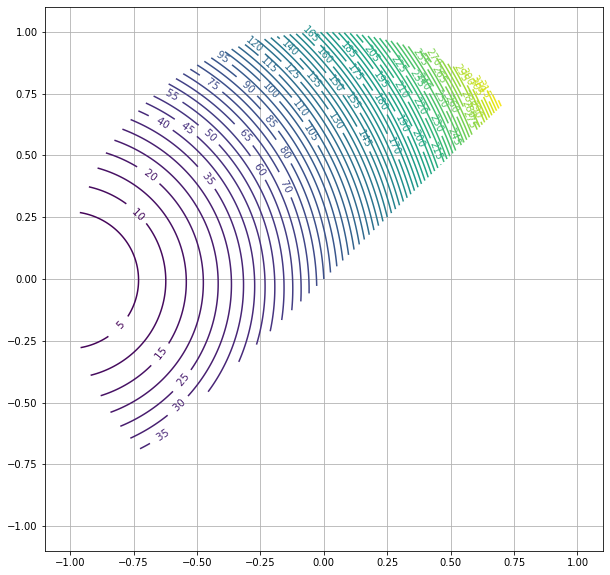

In [23]:
def show_contour():
    amount = np.int(1000)
    x = np.linspace(-R - 0.1, R + 0.1, amount)  
    y = np.linspace(-R - 0.1, R + 0.1, amount)
    x,y = np.meshgrid(x,y)
    f = np.vectorize(lambda x, y: 
                     function(x, y) if y >= x and x**2 + y**2 <= R else np.nan)
    z = f(x, y)
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot()
    cs = ax.contour(x, y, z, levels = 70)
    ax.clabel(cs, fmt = "%3.0f")
    plt.grid()
    plt.show()


show_contour()

# Метод внешних штрафов

In [24]:
class external:

    def function(x, y):
        return max(0, x**2 + y**2 - 1)**2 + max(0, x - y)**2

    def der_x(x, y):
        return 2 * ( 2 * x * max(0, x**2 + y**2 - 1) + max(0, x - y))

    def der_y(x, y):
        return 2 * ( 2 * y * max(0, x**2 + y**2 - 1) - max(0, x - y))

In [25]:
def external_penalty(x, y, k_penalty):
    iterations = 0
    start_time = time()
    alpha = 1.e-4
    print("alpha =", alpha)
    r = 1
    while external.function(x, y) > PRECISION:
        print("r =", r)
        print("penalty =", r*external.function(x, y))
        gr_x = np.inf
        gr_y = np.inf
        while np.sqrt(gr_x**2 + gr_y**2) > PRECISION and external.function(x, y) > PRECISION:
            iterations += 1
            gr_x = der_x(x, y) + r * external.der_x(x, y)
            gr_y = der_y(x, y) + r * external.der_y(x, y)
            x -= alpha * gr_x
            y -= alpha * gr_y
            print("{}) Re={:.5f}, Im={:.5f}, |f|^2={}"
                  .format(iterations, x, y, function(x, y)))
        r *= k_penalty
    print("\nКоличество итераций:", iterations)
    print("Затраченное время (миллисекунды):", round((time() - start_time) * 1000, 3))
    return complex(x, y)

res = external_penalty(-1, 1, 1.5)
print("\nРезультат:\nRe = {:.5f}, Im = {:.5f}".format(res.real, res.imag))

alpha = 0.0001
r = 1
penalty = 1
1) Re=-1.00100, Im=0.98380, |f|^2=71.45180556850462
2) Re=-1.00195, Im=0.96793, |f|^2=69.00462445061461
3) Re=-1.00286, Im=0.95237, |f|^2=66.65370850742809
4) Re=-1.00372, Im=0.93713, |f|^2=64.3945764907527
5) Re=-1.00454, Im=0.92219, |f|^2=62.222996314890736
6) Re=-1.00532, Im=0.90754, |f|^2=60.13496869158128
7) Re=-1.00605, Im=0.89318, |f|^2=58.126712009167605
8) Re=-1.00676, Im=0.87909, |f|^2=56.19464834864226
9) Re=-1.00742, Im=0.86528, |f|^2=54.335390539562866
10) Re=-1.00805, Im=0.85173, |f|^2=52.54573016807487
11) Re=-1.00865, Im=0.83843, |f|^2=50.822626457548765
12) Re=-1.00922, Im=0.82539, |f|^2=49.16319594975212
13) Re=-1.00976, Im=0.81259, |f|^2=47.56470292112649
14) Re=-1.01027, Im=0.80003, |f|^2=46.02455047471372
15) Re=-1.01075, Im=0.78770, |f|^2=44.540272253646904
16) Re=-1.01120, Im=0.77559, |f|^2=43.10952472695985
17) Re=-1.01163, Im=0.76371, |f|^2=41.73008000282701
18) Re=-1.01203, Im=0.75204, |f|^2=40.39981912828097
19) Re=-1.01241, I

# Метод внутренних штрафов

In [26]:
class internal:

    def function(x, y):
        return -1 / (x-y) - 1 / (x**2 + y**2 - 1)

    def der_x(x, y):
        return 1 / (x-y)**2 + (2*x)/(x**2 + y**2 - 1)**2

    def der_y(x, y):
        return (-1) / (x-y)**2 + (2*y)/(x**2 + y**2 - 1)**2

In [27]:
def internal_penalty(x, y, k_penalty):
    iterations = 0
    start_time = time()
    alpha = 1.e-4
    print("alpha =", alpha)
    r = 1     
    while abs(r * internal.function(x, y)) > PRECISION:
        print("r =", r)
        print("penalty =", r*internal.function(x, y))
        gr_x = np.inf
        gr_y = np.inf
        while np.sqrt(gr_x**2 + gr_y**2) > PRECISION and abs(r * internal.function(x, y)) > PRECISION:
            iterations += 1
            gr_x = der_x(x, y) + r * internal.der_x(x, y)
            gr_y = der_y(x, y) + r * internal.der_y(x, y)
            new_x = x - alpha * gr_x
            new_y = y - alpha * gr_y
            if new_y < new_x or new_x**2 + new_y**2 > 1:
                return complex(x, y)
            x = new_x
            y = new_y
            print("{}) Re={:.5f}, Im={:.5f}, |f|^2={}"
                    .format(iterations, x, y, function(x, y)))
        r *= k_penalty
    print("\nКоличество итераций:", iterations)
    print("Затраченное время (миллисекунды):", round((time() - start_time) * 1000, 3))
    return complex(x, y)

res = internal_penalty(0.5, 0.75, 0.05)
print("\nРезультат:\nRe = {:.5f}, Im = {:.5f}".format(res.real, res.imag))

alpha = 0.0001
r = 1
penalty = 9.333333333333332
1) Re=0.46233, Im=0.73044, |f|^2=251.1317439991542
2) Re=0.42748, Im=0.71328, |f|^2=237.42712088078517
3) Re=0.39445, Im=0.69731, |f|^2=224.91826538152492
4) Re=0.36286, Im=0.68212, |f|^2=213.3592802845942
5) Re=0.33250, Im=0.66756, |f|^2=202.61066989497397
6) Re=0.30326, Im=0.65352, |f|^2=192.57691080252968
7) Re=0.27504, Im=0.63995, |f|^2=183.1852399016139
8) Re=0.24776, Im=0.62681, |f|^2=174.37661897754762
9) Re=0.22137, Im=0.61407, |f|^2=166.101242111666
10) Re=0.19580, Im=0.60170, |f|^2=158.31602507594886
11) Re=0.17102, Im=0.58969, |f|^2=150.9830660117358
12) Re=0.14698, Im=0.57802, |f|^2=144.0686279537522
13) Re=0.12365, Im=0.56668, |f|^2=137.54242386177728
14) Re=0.10099, Im=0.55564, |f|^2=131.377088692009
15) Re=0.07898, Im=0.54490, |f|^2=125.54777371782583
16) Re=0.05758, Im=0.53444, |f|^2=120.03182468787837
17) Re=0.03678, Im=0.52426, |f|^2=114.80851991909395
18) Re=0.01654, Im=0.51434, |f|^2=109.85885279661186
19) Re=-0.00316

# Условный градиент

In [28]:
def conditional_gradient(x=0, y=0, delta=0.1):
    iterations = 0
    start_time = time()
    alpha = 1
    print("alpha =", alpha)
    p_x = inf
    p_y = inf
    while fabs(p_x) > PRECISION and fabs(p_y) > PRECISION:
        gr_x = der_x(x, y)
        gr_y = der_y(x, y)
        gr_mod = sqrt(gr_x ** 2 + gr_y ** 2)
        p_x = -gr_x / gr_mod - x
        p_y = -gr_y / gr_mod - y
        new_x = x + alpha * p_x
        new_y = y + alpha * p_y
        if new_y >= new_x and function(new_x, new_y) < function(x, y):
            iterations += 1
            x = new_x
            y = new_y
            print("{}) Re={:.5f}, Im={:.5f}, |f|^2={}"
                .format(iterations, x, y, function(x, y)))
        else:
            alpha *= delta
            print("alpha =", alpha)
    print("\nКоличество итераций:", iterations)
    print("Затраченное время (миллисекунды):", round((time() - start_time) * 1000, 3))
    return complex(x, y)

res = conditional_gradient()
print("\nРезультат:\nRe = {:.5f}, Im = {:.5f}".format(res.real, res.imag))

alpha = 1
1) Re=-0.99897, Im=-0.04541, |f|^2=0.13337443893647377
alpha = 0.1
alpha = 0.010000000000000002
2) Re=-0.98926, Im=-0.03496, |f|^2=0.0867636833808908
3) Re=-0.98234, Im=-0.02506, |f|^2=0.061136112490882105
4) Re=-0.97831, Im=-0.01666, |f|^2=0.048744632053688494
5) Re=-0.97648, Im=-0.01043, |f|^2=0.04319482420328569
6) Re=-0.97586, Im=-0.00629, |f|^2=0.04061605046847156
7) Re=-0.97579, Im=-0.00373, |f|^2=0.0391931404058052
8) Re=-0.97592, Im=-0.00219, |f|^2=0.03819890141754654
9) Re=-0.97612, Im=-0.00128, |f|^2=0.037364685231600595
10) Re=-0.97634, Im=-0.00075, |f|^2=0.03659515046546525
11) Re=-0.97658, Im=-0.00044, |f|^2=0.03585715515165076
12) Re=-0.97681, Im=-0.00026, |f|^2=0.03513925970013847
13) Re=-0.97704, Im=-0.00016, |f|^2=0.034437452365888396
14) Re=-0.97727, Im=-0.00010, |f|^2=0.03375022434325614
15) Re=-0.97750, Im=-0.00007, |f|^2=0.033076899627631204
16) Re=-0.97772, Im=-0.00005, |f|^2=0.032417077545942315
17) Re=-0.97794, Im=-0.00004, |f|^2=0.031770449520947805
1